# 🔴📉**Interpolador de Lagrange**

### 🔴**Questão 1: $P(xi) = Yi$**

Considere o polinômio de Lagrange dado por:


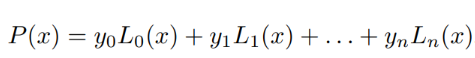

[Fórmula 1: Polinômio de Lagrange]

em que Li(x) são os polinômios de Lagrange de grau n. 

Por que sempre temos P(xi)=yi para todo i de 0 a n?


****

O polinômio interpolador de Lagrange é definido como uma combinação linear de **Polinômios de Lagrange** $Li(x)$, os quais, por sua vez são definidos pela função $δij$ [Fórmula 2], a qual determina que se o grau do polinômio $i$ for diferente de $j$, $Li(xj)$ = 0, caso contrário, isso resulta em 1. Dessa forma, cada $Li(x)$ atua como um polinômio base que é igual a 1 em seu próprio ponto de interpolação $xi$ e zero em todos os outros pontos $xj$, garantindo a precisão nos pontos de dados fornecidos.

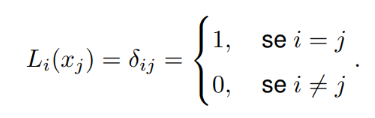

[Fórmula 2: Função Delta para a definição do Polinômio de Lagrange $Li(xj)$]

A partir disso, como demonstrado na Figura 1, dado que $Li(xi)$ = 1 e os demais polinômios são equivalentes a 0, é possível estabelecer que $P(xi)$ é igual a $yi$, assim como no método da Matriz de Vandermonde.

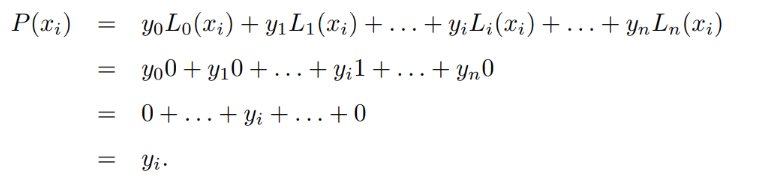

[Figura 1: Prova de $P(xi) = yi$)]

****

Para as demais questões, em primeiro lugar, é preciso resolver a terceira questão, a qual propõe a criação de um código em Python que calcula o polinômio interpolador, via método de Lagrange, a partir de um conjunto de dados.

Partindo do visto que foi visto em sala de aula, é possível estabelecer o seguinte código:

#### 📚**Importação de bibliotecas**

In [3]:
import numpy as np 
import plotly.graph_objs as go
import sympy as sp

### 🔴**Questão 3: Código da Interpolação de Lagrange**

Faça um programa em Python que determine o polinômio interpolador de Lagrange, a partir de um conjunto de dados fornecido.

****

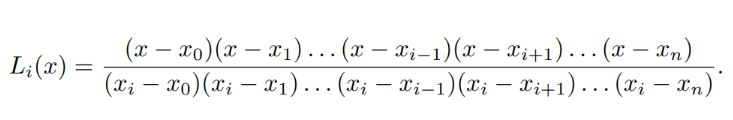 

[Fórmula 3: Polinômio de Lagrange $Li(xj)$]

Considerando a definição de polinômio de Lagrange presente na Fórmula 3, é possível definir que:
* coordenadas_x: Valores de x de todos os pontos que serão interpolados
* coordenadas_y: Valores de y de todos os pontos que serão interpolados
* indice: Índice da lista que corresponde ao ponto $xj$ com $j$ = $i$ do polinômio $Li$

In [6]:
def polinomio_de_lagrange(indice, coordenadas_x, coordenadas_y):
    x = sp.symbols('x')

    polinomio_de_lagrange = 1
  
    for j in range(len(coordenadas_x)):
        if j != indice:
            polinomio_de_lagrange *= (x - coordenadas_x[j]) / (coordenadas_x[j] - coordenadas_x[indice])
   
    polinomio_de_lagrange *= coordenadas_y[indice]
    
    return polinomio_de_lagrange

def polinomio_interpolador(coordenadas_x, coordenadas_y):
    indices = len(coordenadas_x)
    polinomio_interpolador = 0
    for indice in range(indices):
        polinomio_interpolador += polinomio_de_lagrange(indice, coordenadas_x, coordenadas_y)
    polinomio_interpolador = sp.expand(polinomio_interpolador)
    return polinomio_interpolador      

### 🔴 **Questão 2: Teste do Código**

Determine o polinômio de Lagrange que passa pelos pontos (x0,y0) = (-1,0), (x1,y1) = (0,1) e (x2,y2) = (1,2).

****

Definindo duas listas, uma para as coordenadas x dos pontos e outra para as coordenadas y, é possível determinar o polinômio interpolador para os pontos fornecidos.

In [7]:
polinomio_interpolador([-1,0, 1], [0,1,2])

x + 1

### 🔴**Questão Bônus!**

Considere a função f(x)=1/(1+25x²). Considere também uma partição do intervalo [-1,1] na qual a função f está definida.  Escolha os pontos xi a serem interpolados, da seguinte forma xi=-1+(2i)/n, onde n é um valor a ser escolhido. 

a) Plote o polinômio interpolador de Lagrange para n=3. 

b) Plote o polinômio interpolador de Lagrange para n=5.

c) Plote o polinômio interpolador de Lagrange para n=10.

d) Para n cada vez maior, o que é possível perceber no comportamento desta interpolação?  

****

Em primeiro lugar, é possível plotar um gráfico que descreve o comportamento da função fornecida.

In [5]:
# Definição da Função e do intervalo
x = np.linspace(-1, 1, 100)
y = 1 / (1 + 25 * x**2)

# Plotagem do gráfico
trace1 = go.Scatter(x=x, y=y, mode='lines', name='Função f(x) = 1 / (1 + 25x²)', line=dict(color='orange', width=3))

layout = go.Layout(title='Gráfico da função f(x) = 1 / (1 + 25x²)', xaxis=dict(title='x'), yaxis=dict(title='y'))

fig = go.Figure(data=[trace1], layout=layout)

fig.show()



Após isso, é possível estabelecer a função ``definir_pontos``, a qual pode calcular 21 pontos (com suas coordenadas x e y) para cada valor de $n$ estabelecido no enunciado.

In [6]:
def f(x):
    return 1 / (1 + 25 * x**2)

# Função para definir os pontos
def definir_pontos(n):
    x = [-1 + (2 * i) / n for i in range(n+1)]  # n + 1 pontos
    y = [f(xi) for xi in x]  # Valores correspondentes de f(x)
    return x, y

Utilizando essa função, é viável calcular o polinômio interpolador para os pontos obtidos, através da função ``polinomio_interpolador`` criado anteriormente. Aplicando os três valores de $n$ presentes no enunciado (3,5 e 10) na função ``definir_pontos``, é possível, portanto, calcular o polinômio que melhor se ajusta aos dados. Para ajudar na visualização, ainda é possível aplicar o polinômio obtido nos valores de x dos pontos em questão e, a partir disso, plotar gráficos!

##### **Encontrar Pontos e encontrar os polinômios**

In [7]:
x1,y1 = definir_pontos(3)

polinomio1 = polinomio_interpolador(x1,y1)


In [8]:
x2,y2 = definir_pontos(5)

polinomio2 = polinomio_interpolador(x2,y2)


In [9]:
x3,y3 = definir_pontos(10)

polinomio3 = polinomio_interpolador(x3,y3)

**Plotar gráficos**

In [10]:
n = 3
x3, y3 = definir_pontos(n)

polinomio_n3 = polinomio_interpolador(x3, y3)


x_plot = np.linspace(-1, 1, 100)
y_plot = [float(polinomio_n3.evalf(subs={sp.symbols('x'): val})) for val in x_plot]

# Plotagem do gráfico
trace1 = go.Scatter(x=x_plot, y=y_plot, mode='lines', name='Polinômio Interpolador (n=3)', line=dict(color='blue', width=3))
trace2 = go.Scatter(x=x3, y=y3, mode='markers', name='Pontos Interpolados', marker=dict(color='red', size=8))
trace3 = go.Scatter(x=x, y=y, mode='lines', name='Função f(x) = 1 / (1 + 25x²)', line=dict(color='orange', width=3))

layout = go.Layout(title='Polinômio Interpolador de Lagrange para n=3', xaxis=dict(title='x'), yaxis=dict(title='f(x)'))

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()


In [11]:
n = 5
x5, y5 = definir_pontos(n)

polinomio_n5 = polinomio_interpolador(x5, y5)

x_plot = np.linspace(-1, 1, 100)
y_plot = [float(polinomio_n5.evalf(subs={sp.symbols('x'): val})) for val in x_plot]

# Plotagem do gráfico
trace1 = go.Scatter(x=x_plot, y=y_plot, mode='lines', name='Polinômio Interpolador (n=5)', line=dict(color='blue', width=3))
trace2 = go.Scatter(x=x5, y=y5, mode='markers', name='Pontos Interpolados', marker=dict(color='red', size=8))
trace3 = go.Scatter(x=x, y=y, mode='lines', name='Função f(x) = 1 / (1 + 25x²)', line=dict(color='orange', width=3))


layout = go.Layout(title='Polinômio Interpolador de Lagrange para n=5', xaxis=dict(title='x'), yaxis=dict(title='f(x)'))


fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()


In [12]:
n = 10
x10, y10 = definir_pontos(10)

polinomio_n5 = polinomio_interpolador(x10, y10)

x_plot = np.linspace(-1, 1, 100)
y_plot = [float(polinomio_n5.evalf(subs={sp.symbols('x'): val})) for val in x_plot]

# Plotagem do gráfico
trace1 = go.Scatter(x=x_plot, y=y_plot, mode='lines', name='Polinômio Interpolador (n=10)', line=dict(color='blue', width=3))
trace2 = go.Scatter(x=x10, y=y10, mode='markers', name='Pontos Interpolados', marker=dict(color='red', size=8))
trace3 = go.Scatter(x=x, y=y, mode='lines', name='Função f(x) = 1 / (1 + 25x²)', line=dict(color='orange', width=3))


layout = go.Layout(title='Polinômio Interpolador de Lagrange para n=10', xaxis=dict(title='x'), yaxis=dict(title='f(x)'))


fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()


**Conclusões**

A partir desses testes foi possível observar o **fenômeno de Runge**!

Esse é um efeito observado na interpolação polinomial, o qual descreve a ocorrência de grandes erros de aproximação nos extremos do intervalo, onde o polinômio tende a oscilar fortemente entre os pontos de interpolação. Esse efeito pode levar a distorções significativas da função original, mesmo que os pontos de dados estejam próximos, tal como é possível perceber, principalmente, no terceiro gráfico plotado. Ou seja, ao aumentarmos o grau do polinômio, o erro relacionado a interpolação também cresce.

Nesse aspecto, é comum utilizar abordagens alternativas para mitigar esse efeito, como a *interpolação por splines* ou por partes, que são capazes de oferecer um maior controle das oscilações. [2]

### 🗂️ **Referências :)**

[1] Numerical Evaluation - SymPy 1.13.3 documentation. https://docs.sympy.org/latest/modules/evalf.html. Acesso em 17 de outubro de 2024.

[2] Biloti, Ricardo. “Fenômeno de Runge”. Curso de Cálculo Numérico, https://www.ime.unicamp.br/~biloti/an/211/interp-06.html. Acesso em 18 de outubro de 2024.

[3] Wasques, Vinícius Francisco. "Notas de Matemática: Álgebra linear computacional". Acesso em 18 de outubro de 2024.